In [1]:
#import pandas
import pandas as pd


#import data
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status"

#Parse the dates
df = pd.read_csv(url , parse_dates=['created_date'])

#Count the frequency of each complaint type
count = df['complaint_type'].value_counts()

#Print the frequencies of each complaint
print(count)





HEAT/HOT WATER            1239028
HEATING                    887869
PLUMBING                   709619
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       449193
PAINT - PLASTER            361257
PAINT/PLASTER              345512
ELECTRIC                   306618
NONCONST                   260890
DOOR/WINDOW                204292
WATER LEAK                 192724
GENERAL                    150508
FLOORING/STAIRS            137026
APPLIANCE                  112232
HPD Literature Request      52830
SAFETY                      51253
OUTSIDE BUILDING             7116
ELEVATOR                     6682
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

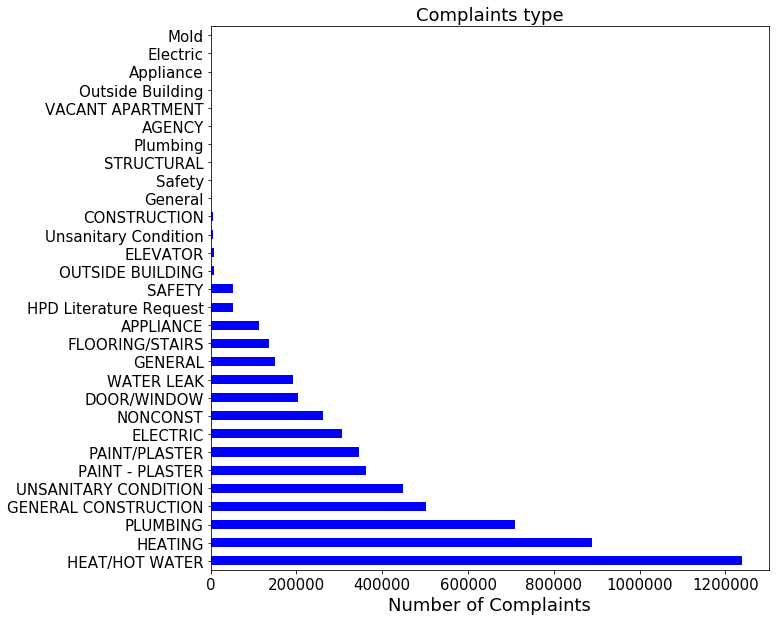

In [4]:
import matplotlib.pyplot as plt

#plotting
count.plot(kind='barh', figsize=(10, 10), color='blue',fontsize=15)
plt.xlabel('Number of Complaints',fontsize=18)
plt.title('Complaints type', fontsize=18)

plt.show()

 

In [7]:
#Merging Heating, and Hot Water/Heat seems logical

import numpy as np

df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])
df['complaint_type'].value_counts()



HEAT/HOT WATER            2126897
PLUMBING                   709619
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       449193
PAINT - PLASTER            361257
PAINT/PLASTER              345512
ELECTRIC                   306618
NONCONST                   260890
DOOR/WINDOW                204292
WATER LEAK                 192724
GENERAL                    150508
FLOORING/STAIRS            137026
APPLIANCE                  112232
HPD Literature Request      52830
SAFETY                      51253
OUTSIDE BUILDING             7116
ELEVATOR                     6682
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold                            1
Name: complain

In [14]:
#Analyzing further, Heating complaints vs year.
#Check to make sure created_date is in correct format
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5987732 entries, 0 to 5987731
Data columns (total 17 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
created_year              int64
created_month             int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(10)
memory usage: 776.6+ MB


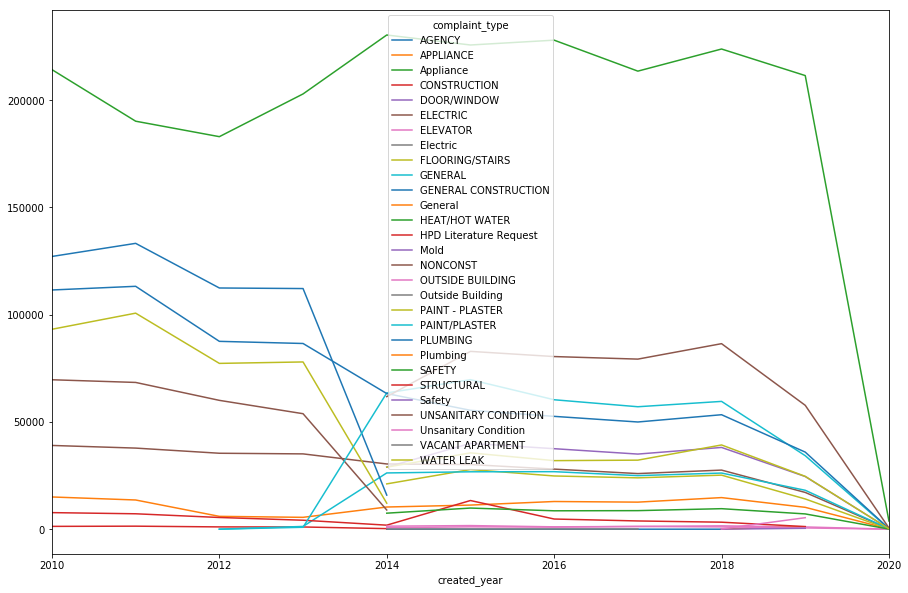

In [20]:
#Plotting
fig, ax = plt.subplots(figsize=(15,10))
df.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot(ax=ax)


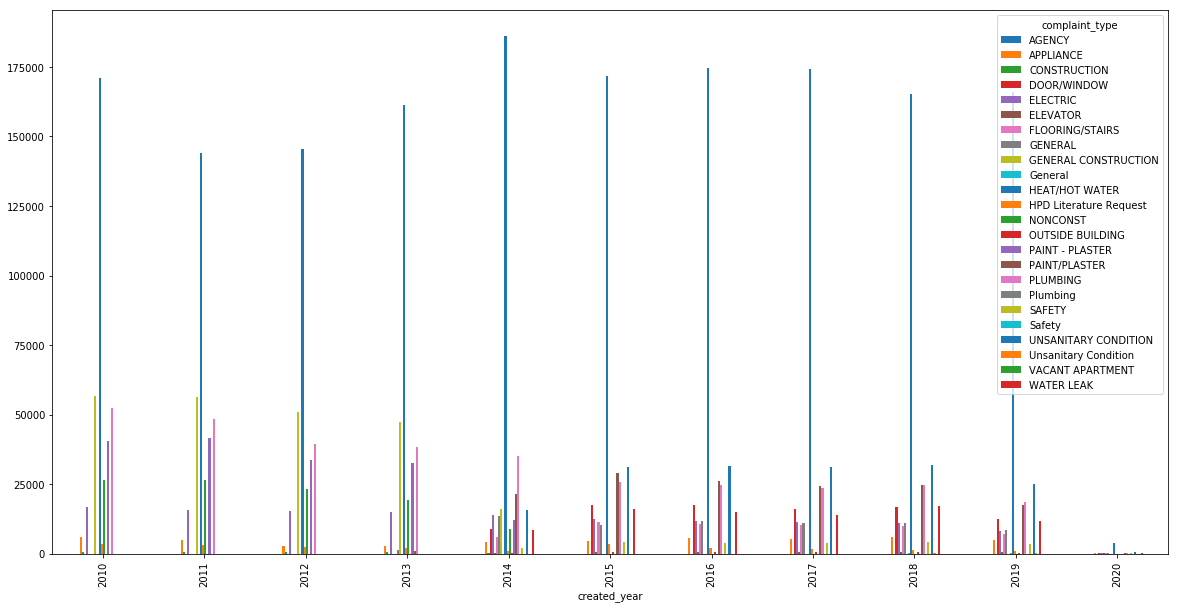

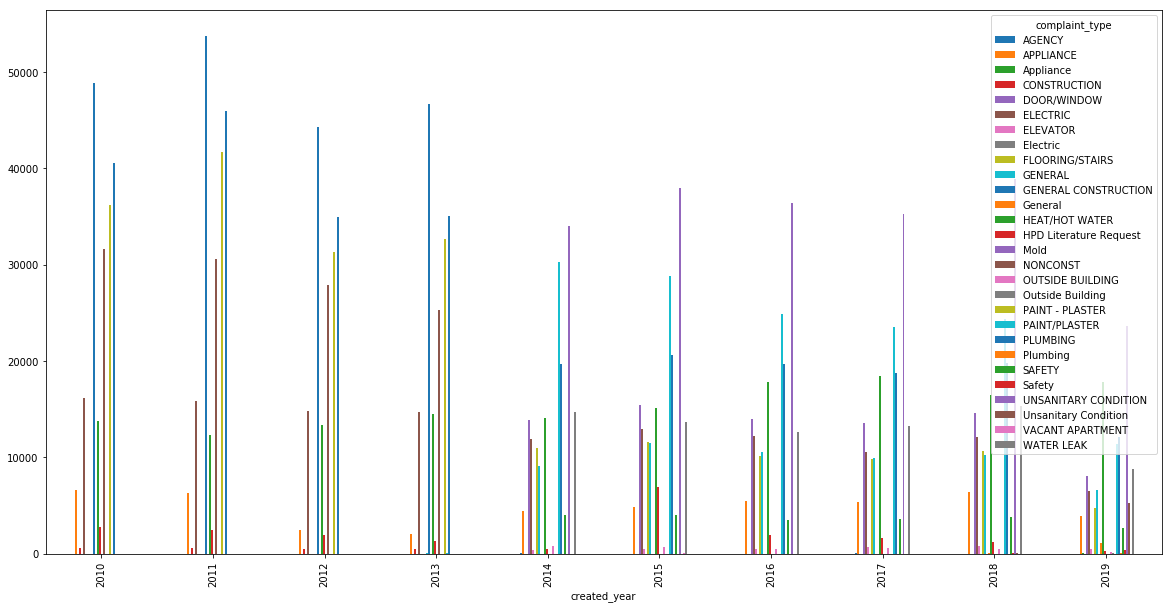

In [22]:
#Lets isolate for cold (winter) and warm (Summer) seasons

fig, ax = plt.subplots(figsize=(20,10))
df[df['created_month'].isin([11, 12,1,2,3])].groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot.bar(ax=ax)

fig, ax = plt.subplots(figsize=(20,10))
df[df['created_month'].isin([5,6,7,8,9])].groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot.bar(ax=ax)

In [ ]:
#Conclusion: The Department of Housing Preservation and Development of New York City should focus on Heat/Hot Water(Heating) complaints first, especially in the winter period. 